# Importing Necessary Modules

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, validation_curve
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report,roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


# Data Reading

In [5]:
player_career_df = pd.read_csv('https://raw.githubusercontent.com/richard2323233/schulich_data_science/main/player_career_info.csv')
player_game_df = pd.read_csv('https://raw.githubusercontent.com/richard2323233/schulich_data_science/main/player_per_game.csv')
player_shooting_df = pd.read_csv('https://raw.githubusercontent.com/richard2323233/schulich_data_science/main/player_shooting.csv')

In [6]:
player_career_df.head(10)

,player_id,player,birth_year,hof,num_seasons,first_seas,last_seas
0,1,Al Brightman,NaN,False,1,1947,1947
1,2,Al Lujack,NaN,False,1,1947,1947
2,3,Al Negratti,NaN,False,1,1947,1947
3,4,Angelo Musi,NaN,False,3,1947,1949
4,5,Ariel Maughan,1923.0,False,5,1947,1951
5,6,Armand Cure,NaN,False,1,1947,1947
6,7,Art Hillhouse,NaN,False,2,1947,1948
7,8,Art Spector,1920.0,False,4,1947,1950
8,9,Art Stolkey,NaN,False,1,1947,1947
9,10,Aubrey Davis,NaN,False,1,1947,1947


In [7]:
player_game_df.head(10)

,seas_id,season,player_id,player,birth_year,pos,age,experience,lg,tm,...,ft_percent,orb_per_game,drb_per_game,trb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pf_per_game,pts_per_game
0,31136,2024,5025,A.J. Green,NaN,SG,24.0,2,NBA,MIL,...,0.895,0.2,1.0,1.1,0.5,0.2,0.1,0.2,0.9,4.5
1,31137,2024,5026,A.J. Lawson,NaN,SG,23.0,2,NBA,DAL,...,0.652,0.3,0.9,1.2,0.5,0.2,0.1,0.3,0.5,3.2
2,31138,2024,5027,AJ Griffin,NaN,SF,20.0,2,NBA,ATL,...,1.000,0.1,0.8,0.9,0.3,0.1,0.1,0.4,0.3,2.4
3,31139,2024,4219,Aaron Gordon,NaN,PF,28.0,10,NBA,DEN,...,0.658,2.4,4.1,6.5,3.5,0.8,0.6,1.4,1.9,13.9
4,31140,2024,4582,Aaron Holiday,NaN,PG,27.0,6,NBA,HOU,...,0.921,0.3,1.3,1.6,1.8,0.5,0.1,0.7,1.6,6.6
5,31141,2024,4805,Aaron Nesmith,NaN,SF,24.0,4,NBA,IND,...,0.781,0.9,2.9,3.8,1.5,0.9,0.7,0.9,3.3,12.2
6,31142,2024,4900,Aaron Wiggins,NaN,SG,25.0,3,NBA,OKC,...,0.789,0.8,1.6,2.4,1.1,0.7,0.2,0.7,1.2,6.9
7,31143,2024,5109,Adam Flagler,NaN,SG,24.0,1,NBA,OKC,...,NaN,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.5
8,31144,2024,5110,Adama Sanogo,NaN,PF,21.0,1,NBA,CHI,...,0.667,2.1,1.9,4.0,0.0,0.1,0.0,0.6,0.6,4.0
9,31145,2024,4688,Admiral Schofield,NaN,PF,26.0,4,NBA,ORL,...,0.000,0.1,0.6,0.7,0.3,0.0,0.0,0.2,0.4,1.1


In [8]:
player_shooting_df.head(10)

,seas_id,season,player_id,player,birth_year,pos,age,experience,lg,tm,...,fg_percent_from_x16_3p_range,fg_percent_from_x3p_range,percent_assisted_x2p_fg,percent_assisted_x3p_fg,percent_dunks_of_fga,num_of_dunks,percent_corner_3s_of_3pa,corner_3_point_percent,num_heaves_attempted,num_heaves_made
0,31136,2024,5025,A.J. Green,NaN,SG,24,2,NBA,MIL,...,0.500,0.408,0.857,0.942,0.000,0,0.225,0.447,0,0
1,31137,2024,5026,A.J. Lawson,NaN,SG,23,2,NBA,DAL,...,0.500,0.260,0.610,1.000,0.107,12,0.640,0.250,0,0
2,31138,2024,5027,AJ Griffin,NaN,SF,20,2,NBA,ATL,...,0.250,0.256,0.750,0.800,0.016,1,0.205,0.250,0,0
3,31139,2024,4219,Aaron Gordon,NaN,PF,28,10,NBA,DEN,...,0.417,0.290,0.642,0.850,0.256,171,0.391,0.352,1,0
4,31140,2024,4582,Aaron Holiday,NaN,PG,27,6,NBA,HOU,...,0.350,0.387,0.255,0.810,0.005,2,0.212,0.478,1,0
5,31141,2024,4805,Aaron Nesmith,NaN,SF,24,4,NBA,IND,...,0.667,0.419,0.697,0.986,0.052,31,0.419,0.436,0,0
6,31142,2024,4900,Aaron Wiggins,NaN,SG,25,3,NBA,OKC,...,0.000,0.492,0.667,0.968,0.042,12,0.413,0.404,0,0
7,31143,2024,5109,Adam Flagler,NaN,SG,24,1,NBA,OKC,...,NaN,0.167,NaN,0.000,0.000,0,0.000,NaN,0,0
8,31144,2024,5110,Adama Sanogo,NaN,PF,21,1,NBA,CHI,...,NaN,NaN,0.500,NaN,0.000,0,NaN,NaN,0,0
9,31145,2024,4688,Admiral Schofield,NaN,PF,26,4,NBA,ORL,...,0.500,0.375,0.500,1.000,0.154,2,0.250,0.500,0,0


# Data Merging

In [9]:
# Common player_id column so join all 3 dataframes on id column
player_career_df.set_index('player_id', inplace = True)
player_game_df.set_index('player_id', inplace = True)
player_shooting_df.set_index('player_id', inplace = True)

In [10]:
nba_player_df = player_game_df.join(player_shooting_df, lsuffix= '_player', rsuffix= '_athlete').join(player_career_df)

In [11]:
nba_player_df.head(10)

,seas_id_player,season_player,player_player,birth_year_player,pos_player,age_player,experience_player,lg_player,tm_player,g_player,...,percent_corner_3s_of_3pa,corner_3_point_percent,num_heaves_attempted,num_heaves_made,player,birth_year,hof,num_seasons,first_seas,last_seas
player_id,,,,,,,,,,,,,,,,,,,,,
5025,31136,2024,A.J. Green,NaN,SG,24.0,2,NBA,MIL,56,...,0.225,0.447,0.0,0.0,A.J. Green,NaN,False,2,2023,2024
5025,31136,2024,A.J. Green,NaN,SG,24.0,2,NBA,MIL,56,...,0.210,0.409,0.0,0.0,A.J. Green,NaN,False,2,2023,2024
5026,31137,2024,A.J. Lawson,NaN,SG,23.0,2,NBA,DAL,42,...,0.640,0.250,0.0,0.0,A.J. Lawson,NaN,False,2,2023,2024
5026,31137,2024,A.J. Lawson,NaN,SG,23.0,2,NBA,DAL,42,...,0.560,0.214,0.0,0.0,A.J. Lawson,NaN,False,2,2023,2024
5026,31137,2024,A.J. Lawson,NaN,SG,23.0,2,NBA,DAL,42,...,NaN,NaN,0.0,0.0,A.J. Lawson,NaN,False,2,2023,2024
5026,31137,2024,A.J. Lawson,NaN,SG,23.0,2,NBA,DAL,42,...,0.560,0.214,0.0,0.0,A.J. Lawson,NaN,False,2,2023,2024
5027,31138,2024,AJ Griffin,NaN,SF,20.0,2,NBA,ATL,20,...,0.205,0.250,0.0,0.0,AJ Griffin,NaN,False,2,2023,2024
5027,31138,2024,AJ Griffin,NaN,SF,20.0,2,NBA,ATL,20,...,0.293,0.408,0.0,0.0,AJ Griffin,NaN,False,2,2023,2024
4219,31139,2024,Aaron Gordon,NaN,PF,28.0,10,NBA,DEN,73,...,0.391,0.352,1.0,0.0,Aaron Gordon,NaN,False,10,2015,2024


In [12]:
nba_player_df.columns

Index(['seas_id_player', 'season_player', 'player_player', 'birth_year_player',
       'pos_player', 'age_player', 'experience_player', 'lg_player',
       'tm_player', 'g_player', 'gs', 'mp_per_game', 'fg_per_game',
       'fga_per_game', 'fg_percent_player', 'x3p_per_game', 'x3pa_per_game',
       'x3p_percent', 'x2p_per_game', 'x2pa_per_game', 'x2p_percent',
       'e_fg_percent', 'ft_per_game', 'fta_per_game', 'ft_percent',
       'orb_per_game', 'drb_per_game', 'trb_per_game', 'ast_per_game',
       'stl_per_game', 'blk_per_game', 'tov_per_game', 'pf_per_game',
       'pts_per_game', 'seas_id_athlete', 'season_athlete', 'player_athlete',
       'birth_year_athlete', 'pos_athlete', 'age_athlete',
       'experience_athlete', 'lg_athlete', 'tm_athlete', 'g_athlete', 'mp',
       'fg_percent_athlete', 'avg_dist_fga', 'percent_fga_from_x2p_range',
       'percent_fga_from_x0_3_range', 'percent_fga_from_x3_10_range',
       'percent_fga_from_x10_16_range', 'percent_fga_from_x16_3p_rang

# Data Cleaning and Preparation

In [13]:
nba_player_df = nba_player_df[['seas_id_player', 'season_player', 'player_player',
    'birth_year_player', 'pos_player', 'age_player', 'experience_player', 'lg_player', 'tm_player',
    'g_player', 'gs', 'mp_per_game', 'fg_per_game', 'fga_per_game', 'fg_percent_player',
    'x3p_per_game', 'x3pa_per_game', 'x3p_percent', 'x2p_per_game', 'x2pa_per_game', 'x2p_percent',
    'e_fg_percent', 'ft_per_game', 'fta_per_game', 'ft_percent', 'orb_per_game', 'drb_per_game',
    'trb_per_game', 'ast_per_game', 'stl_per_game', 'blk_per_game', 'tov_per_game', 'pf_per_game',
    'pts_per_game', 'avg_dist_fga', 'percent_fga_from_x2p_range','percent_fga_from_x3p_range',
    'fg_percent_from_x2p_range', 'fg_percent_from_x3p_range', 'percent_assisted_x2p_fg', 'percent_assisted_x3p_fg',
    'percent_dunks_of_fga', 'num_of_dunks', 'corner_3_point_percent', 'num_heaves_attempted', 'num_heaves_made',
    'hof', 'num_seasons', 'first_seas', 'last_seas']]

In [14]:
nba_player_df['seas_id_player'].count()

209198

In [15]:
nba_player_df.duplicated().sum()

398

In [16]:
nba_player_df.isnull().sum()

seas_id_player                     0
season_player                      0
player_player                      0
birth_year_player             204532
pos_player                         0
age_player                        22
experience_player                  0
lg_player                          0
tm_player                          0
g_player                           0
gs                              8639
mp_per_game                     1083
fg_per_game                        0
fga_per_game                       0
fg_percent_player                713
x3p_per_game                    6352
x3pa_per_game                   6352
x3p_percent                    31501
x2p_per_game                       0
x2pa_per_game                      0
x2p_percent                     1143
e_fg_percent                     713
ft_per_game                        0
fta_per_game                       0
ft_percent                      6176
orb_per_game                    4657
drb_per_game                    4657
t

In [17]:
# Drop Duplicate values
nba_player_df.drop_duplicates()


,seas_id_player,season_player,player_player,birth_year_player,pos_player,age_player,experience_player,lg_player,tm_player,g_player,...,percent_assisted_x3p_fg,percent_dunks_of_fga,num_of_dunks,corner_3_point_percent,num_heaves_attempted,num_heaves_made,hof,num_seasons,first_seas,last_seas
player_id,,,,,,,,,,,,,,,,,,,,,
5025,31136,2024,A.J. Green,NaN,SG,24.0,2,NBA,MIL,56,...,0.942,0.000,0.0,0.447,0.0,0.0,False,2,2023,2024
5025,31136,2024,A.J. Green,NaN,SG,24.0,2,NBA,MIL,56,...,0.909,0.000,0.0,0.409,0.0,0.0,False,2,2023,2024
5026,31137,2024,A.J. Lawson,NaN,SG,23.0,2,NBA,DAL,42,...,1.000,0.107,12.0,0.250,0.0,0.0,False,2,2023,2024
5026,31137,2024,A.J. Lawson,NaN,SG,23.0,2,NBA,DAL,42,...,1.000,0.136,5.0,0.214,0.0,0.0,False,2,2023,2024
5026,31137,2024,A.J. Lawson,NaN,SG,23.0,2,NBA,DAL,42,...,NaN,1.000,1.0,NaN,0.0,0.0,False,2,2023,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,200,1947,Walt Miller,NaN,F,31.0,1,BAA,PIT,12,...,NaN,NaN,NaN,NaN,NaN,NaN,False,1,1947,1947
158,201,1947,Warren Fenley,NaN,F,24.0,1,BAA,BOS,33,...,NaN,NaN,NaN,NaN,NaN,NaN,False,1,1947,1947
159,202,1947,Wilbert Kautz,NaN,G-F,31.0,1,BAA,CHS,50,...,NaN,NaN,NaN,NaN,NaN,NaN,False,1,1947,1947


In [20]:
# Reset index of nba dataframe
nba_player_df.reset_index(inplace = True)

In [21]:
nba_player_df.describe()

,index,player_id,seas_id_player,season_player,birth_year_player,age_player,experience_player,g_player,gs,mp_per_game,...,percent_assisted_x2p_fg,percent_assisted_x3p_fg,percent_dunks_of_fga,num_of_dunks,corner_3_point_percent,num_heaves_attempted,num_heaves_made,num_seasons,first_seas,last_seas
count,209198.000000,209198.000000,209198.000000,209198.000000,4666.000000,209176.000000,209198.000000,209198.000000,200559.000000,208115.000000,...,193502.000000,147197.000000,195904.000000,196607.000000,147799.000000,196607.000000,196607.000000,209198.000000,209198.000000,209198.000000
mean,104598.500000,3380.220566,21681.056028,2007.770782,1956.597085,27.245879,6.351151,50.873182,26.828589,22.056526,...,0.544795,0.854989,0.053632,18.485237,0.349112,0.819935,0.022141,11.239486,2002.306552,2012.823277
std,60390.405144,810.883245,6261.215711,12.372710,20.354756,4.252197,4.141632,25.154228,28.889252,9.822181,...,0.201828,0.185743,0.077057,30.339935,0.191797,1.465904,0.154197,4.420665,11.992137,12.048772
min,0.000000,1.000000,1.000000,1947.000000,1914.000000,18.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1947.000000,1947.000000
25%,52299.250000,2967.000000,18001.000000,2002.000000,1944.000000,24.000000,3.000000,29.000000,1.000000,14.200000,...,0.404000,0.786000,0.002000,0.000000,0.269000,0.000000,0.000000,8.000000,1997.000000,2008.000000
50%,104598.500000,3437.000000,22239.000000,2010.000000,1952.000000,27.000000,6.000000,56.000000,14.000000,22.000000,...,0.573000,0.921000,0.026000,6.000000,0.368000,0.000000,0.000000,12.000000,2004.000000,2015.000000
75%,156897.750000,3913.000000,26386.000000,2017.000000,1975.000000,30.000000,9.000000,74.000000,52.000000,30.300000,...,0.688000,1.000000,0.072000,23.000000,0.444000,1.000000,0.000000,14.000000,2010.000000,2022.000000
max,209197.000000,5209.000000,31870.000000,2024.000000,2002.000000,46.000000,22.000000,90.000000,83.000000,48.500000,...,1.000000,1.000000,1.000000,306.000000,1.000000,18.000000,2.000000,22.000000,2024.000000,2024.000000


In [22]:
# Renaming columns for better analysis and readability
nba_player_df.columns

Index(['index', 'player_id', 'seas_id_player', 'season_player',
       'player_player', 'birth_year_player', 'pos_player', 'age_player',
       'experience_player', 'lg_player', 'tm_player', 'g_player', 'gs',
       'mp_per_game', 'fg_per_game', 'fga_per_game', 'fg_percent_player',
       'x3p_per_game', 'x3pa_per_game', 'x3p_percent', 'x2p_per_game',
       'x2pa_per_game', 'x2p_percent', 'e_fg_percent', 'ft_per_game',
       'fta_per_game', 'ft_percent', 'orb_per_game', 'drb_per_game',
       'trb_per_game', 'ast_per_game', 'stl_per_game', 'blk_per_game',
       'tov_per_game', 'pf_per_game', 'pts_per_game', 'avg_dist_fga',
       'percent_fga_from_x2p_range', 'percent_fga_from_x3p_range',
       'fg_percent_from_x2p_range', 'fg_percent_from_x3p_range',
       'percent_assisted_x2p_fg', 'percent_assisted_x3p_fg',
       'percent_dunks_of_fga', 'num_of_dunks', 'corner_3_point_percent',
       'num_heaves_attempted', 'num_heaves_made', 'hof', 'num_seasons',
       'first_seas', 'last_s

In [23]:
nba_column_name = {
    'player_id': 'player_id',
    'seas_id_player': 'season_id',
    'season_player': 'season',
    'player_player': 'player_name',
    'birth_year_player': 'birth_year',
    'pos_player': 'position',
    'age_player': 'age',
    'experience_player': 'experience',
    'lg_player': 'league',
    'tm_player': 'team',
    'g_player': 'games_played',
    'gs': 'games_started',
    'mp_per_game': 'mins_per_game',
    'fg_per_game': 'field_goals',
    'fga_per_game': 'field_goals_attempt',
    'fg_percent_player': 'field_goal_percent',
    'x3p_per_game': 'field_goals_3pt',
    'x3pa_per_game': 'attempts_3pt',
    'x3p_percent': 'percent_3pt',
    'x2p_per_game': 'field_goals_2pt',
    'x2pa_per_game': 'attempts_2pt',
    'x2p_percent': 'percent_2pt',
    'e_fg_percent': 'effective_field_goal_percent',
    'ft_per_game': 'free_throws',
    'fta_per_game': 'free_throws_attempt',
    'ft_percent': 'free_throws_percent',
    'orb_per_game': 'offensive_rebounds',
    'drb_per_game': 'defensive_rebounds',
    'trb_per_game': 'total_rebounds',
    'ast_per_game': 'assists',
    'stl_per_game': 'steals',
    'blk_per_game': 'blocks',
    'tov_per_game': 'turnovers',
    'pf_per_game': 'personal_fouls',
    'pts_per_game': 'points',
    'avg_dist_fga': 'average_shot_distance',
    'percent_fga_from_x2p_range': 'field_goal_attempts_percent_2pt_range',
    'percent_fga_from_x3p_range': 'field_goal_attempts_percent_3pt_range',
    'fg_percent_from_x2p_range': 'field_goal_percent_2pt_range',
    'fg_percent_from_x3p_range': 'field_goal_percent_3pt_range',
    'percent_assisted_x2p_fg': 'field_goal_assist_percent_2pt_range',
    'percent_assisted_x3p_fg': 'field_goal_assist_percent_3pt_range',
    'percent_dunks_of_fga': 'field_goal_attempts_dunk_percent',
    'num_of_dunks': 'num_of_dunks',
    'corner_3_point_percent': 'corner_3pt_percent',
    'num_heaves_attempted': 'num_heaves_attempted',
    'num_heaves_made': 'num_heaves_made',
    'hof': 'hall_of_fame_status',
    'num_seasons': 'num_seasons',
    'first_seas': 'first_season',
    'last_seas': 'last_season'
}

nba_player_df = nba_player_df.rename(columns = nba_column_name)

In [24]:
nba_player_df

,index,player_id,season_id,season,player_name,birth_year,position,age,experience,league,...,field_goal_assist_percent_3pt_range,field_goal_attempts_dunk_percent,num_of_dunks,corner_3pt_percent,num_heaves_attempted,num_heaves_made,hall_of_fame_status,num_seasons,first_season,last_season
0,0,5025,31136,2024,A.J. Green,NaN,SG,24.0,2,NBA,...,0.942,0.000,0.0,0.447,0.0,0.0,False,2,2023,2024
1,1,5025,31136,2024,A.J. Green,NaN,SG,24.0,2,NBA,...,0.909,0.000,0.0,0.409,0.0,0.0,False,2,2023,2024
2,2,5026,31137,2024,A.J. Lawson,NaN,SG,23.0,2,NBA,...,1.000,0.107,12.0,0.250,0.0,0.0,False,2,2023,2024
3,3,5026,31137,2024,A.J. Lawson,NaN,SG,23.0,2,NBA,...,1.000,0.136,5.0,0.214,0.0,0.0,False,2,2023,2024
4,4,5026,31137,2024,A.J. Lawson,NaN,SG,23.0,2,NBA,...,NaN,1.000,1.0,NaN,0.0,0.0,False,2,2023,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209193,209193,157,200,1947,Walt Miller,NaN,F,31.0,1,BAA,...,NaN,NaN,NaN,NaN,NaN,NaN,False,1,1947,1947
209194,209194,158,201,1947,Warren Fenley,NaN,F,24.0,1,BAA,...,NaN,NaN,NaN,NaN,NaN,NaN,False,1,1947,1947
209195,209195,159,202,1947,Wilbert Kautz,NaN,G-F,31.0,1,BAA,...,NaN,NaN,NaN,NaN,NaN,NaN,False,1,1947,1947
209196,209196,160,203,1947,Woody Grimshaw,NaN,G,27.0,1,BAA,...,NaN,NaN,NaN,NaN,NaN,NaN,False,1,1947,1947


In [25]:
nba_player_df.describe()

,index,player_id,season_id,season,birth_year,age,experience,games_played,games_started,mins_per_game,...,field_goal_assist_percent_2pt_range,field_goal_assist_percent_3pt_range,field_goal_attempts_dunk_percent,num_of_dunks,corner_3pt_percent,num_heaves_attempted,num_heaves_made,num_seasons,first_season,last_season
count,209198.000000,209198.000000,209198.000000,209198.000000,4666.000000,209176.000000,209198.000000,209198.000000,200559.000000,208115.000000,...,193502.000000,147197.000000,195904.000000,196607.000000,147799.000000,196607.000000,196607.000000,209198.000000,209198.000000,209198.000000
mean,104598.500000,3380.220566,21681.056028,2007.770782,1956.597085,27.245879,6.351151,50.873182,26.828589,22.056526,...,0.544795,0.854989,0.053632,18.485237,0.349112,0.819935,0.022141,11.239486,2002.306552,2012.823277
std,60390.405144,810.883245,6261.215711,12.372710,20.354756,4.252197,4.141632,25.154228,28.889252,9.822181,...,0.201828,0.185743,0.077057,30.339935,0.191797,1.465904,0.154197,4.420665,11.992137,12.048772
min,0.000000,1.000000,1.000000,1947.000000,1914.000000,18.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1947.000000,1947.000000
25%,52299.250000,2967.000000,18001.000000,2002.000000,1944.000000,24.000000,3.000000,29.000000,1.000000,14.200000,...,0.404000,0.786000,0.002000,0.000000,0.269000,0.000000,0.000000,8.000000,1997.000000,2008.000000
50%,104598.500000,3437.000000,22239.000000,2010.000000,1952.000000,27.000000,6.000000,56.000000,14.000000,22.000000,...,0.573000,0.921000,0.026000,6.000000,0.368000,0.000000,0.000000,12.000000,2004.000000,2015.000000
75%,156897.750000,3913.000000,26386.000000,2017.000000,1975.000000,30.000000,9.000000,74.000000,52.000000,30.300000,...,0.688000,1.000000,0.072000,23.000000,0.444000,1.000000,0.000000,14.000000,2010.000000,2022.000000
max,209197.000000,5209.000000,31870.000000,2024.000000,2002.000000,46.000000,22.000000,90.000000,83.000000,48.500000,...,1.000000,1.000000,1.000000,306.000000,1.000000,18.000000,2.000000,22.000000,2024.000000,2024.000000


In [26]:
# Filtering Dataset from year 2013-2024
# Analyzing dataset for the current years [2013-2024] 

nba_player_df = nba_player_df[nba_player_df['first_season'] >= 2013]
nba_player_df

,index,player_id,season_id,season,player_name,birth_year,position,age,experience,league,...,field_goal_assist_percent_3pt_range,field_goal_attempts_dunk_percent,num_of_dunks,corner_3pt_percent,num_heaves_attempted,num_heaves_made,hall_of_fame_status,num_seasons,first_season,last_season
0,0,5025,31136,2024,A.J. Green,NaN,SG,24.0,2,NBA,...,0.942,0.000,0.0,0.447,0.0,0.0,False,2,2023,2024
1,1,5025,31136,2024,A.J. Green,NaN,SG,24.0,2,NBA,...,0.909,0.000,0.0,0.409,0.0,0.0,False,2,2023,2024
2,2,5026,31137,2024,A.J. Lawson,NaN,SG,23.0,2,NBA,...,1.000,0.107,12.0,0.250,0.0,0.0,False,2,2023,2024
3,3,5026,31137,2024,A.J. Lawson,NaN,SG,23.0,2,NBA,...,1.000,0.136,5.0,0.214,0.0,0.0,False,2,2023,2024
4,4,5026,31137,2024,A.J. Lawson,NaN,SG,23.0,2,NBA,...,NaN,1.000,1.0,NaN,0.0,0.0,False,2,2023,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82773,82773,4140,24475,2013,Will Barton,NaN,SG,22.0,1,NBA,...,0.696,0.071,24.0,0.240,2.0,0.0,False,11,2013,2023
82774,82774,4140,24475,2013,Will Barton,NaN,SG,22.0,1,NBA,...,0.250,0.080,8.0,0.250,1.0,0.0,False,11,2013,2023
82775,82775,4140,24475,2013,Will Barton,NaN,SG,22.0,1,NBA,...,0.789,0.067,16.0,0.235,1.0,0.0,False,11,2013,2023
82776,82776,4140,24475,2013,Will Barton,NaN,SG,22.0,1,NBA,...,0.800,0.109,16.0,0.400,1.0,0.0,False,11,2013,2023


In [27]:
# Checking for null/missing values
nan_columns = nba_player_df.columns[nba_player_df.isna().any()].to_list()
print(f'Columns with NaN values: {nan_columns}')

Columns with NaN values: ['birth_year', 'field_goal_percent', 'percent_3pt', 'percent_2pt', 'effective_field_goal_percent', 'free_throws_percent', 'average_shot_distance', 'field_goal_attempts_percent_2pt_range', 'field_goal_attempts_percent_3pt_range', 'field_goal_percent_2pt_range', 'field_goal_percent_3pt_range', 'field_goal_assist_percent_2pt_range', 'field_goal_assist_percent_3pt_range', 'field_goal_attempts_dunk_percent', 'corner_3pt_percent']


In [28]:
nba_player_df[['birth_year', 'field_goal_percent', 'percent_3pt', 'percent_2pt', 'effective_field_goal_percent', 
               'free_throws_percent', 'average_shot_distance', 'field_goal_attempts_percent_2pt_range', 
               'field_goal_attempts_percent_3pt_range', 'field_goal_percent_2pt_range', 'field_goal_percent_3pt_range', 
               'field_goal_assist_percent_2pt_range', 'field_goal_assist_percent_3pt_range', 'field_goal_attempts_dunk_percent', 
               'corner_3pt_percent']].isna().sum()

birth_year                               39045
field_goal_percent                         242
percent_3pt                               2369
percent_2pt                                485
effective_field_goal_percent               242
free_throws_percent                       1868
average_shot_distance                      242
field_goal_attempts_percent_2pt_range      242
field_goal_attempts_percent_3pt_range      242
field_goal_percent_2pt_range               485
field_goal_percent_3pt_range              2369
field_goal_assist_percent_2pt_range       1059
field_goal_assist_percent_3pt_range       5391
field_goal_attempts_dunk_percent           242
corner_3pt_percent                        5409
dtype: int64

In [29]:
# Apart from birth_yearall other columns will have NaN values
# The other columns having NaN values cannot be dropped 
# The reason is as the player might not have played/did not score points that game
# But that is still crucial information for the dataset

In [30]:
missval_birth_year = round((39045/39135) * 100, 2)
print(f'Percent of birth year missing values: {missval_birth_year}')

Percent of birth year missing values: 99.77


In [31]:
# Dropping birth_year column as almost all the values in the column are NaN values
nba_player_df = nba_player_df.drop(columns = 'birth_year') 

In [32]:
nba_player_df

,index,player_id,season_id,season,player_name,position,age,experience,league,team,...,field_goal_assist_percent_3pt_range,field_goal_attempts_dunk_percent,num_of_dunks,corner_3pt_percent,num_heaves_attempted,num_heaves_made,hall_of_fame_status,num_seasons,first_season,last_season
0,0,5025,31136,2024,A.J. Green,SG,24.0,2,NBA,MIL,...,0.942,0.000,0.0,0.447,0.0,0.0,False,2,2023,2024
1,1,5025,31136,2024,A.J. Green,SG,24.0,2,NBA,MIL,...,0.909,0.000,0.0,0.409,0.0,0.0,False,2,2023,2024
2,2,5026,31137,2024,A.J. Lawson,SG,23.0,2,NBA,DAL,...,1.000,0.107,12.0,0.250,0.0,0.0,False,2,2023,2024
3,3,5026,31137,2024,A.J. Lawson,SG,23.0,2,NBA,DAL,...,1.000,0.136,5.0,0.214,0.0,0.0,False,2,2023,2024
4,4,5026,31137,2024,A.J. Lawson,SG,23.0,2,NBA,DAL,...,NaN,1.000,1.0,NaN,0.0,0.0,False,2,2023,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82773,82773,4140,24475,2013,Will Barton,SG,22.0,1,NBA,POR,...,0.696,0.071,24.0,0.240,2.0,0.0,False,11,2013,2023
82774,82774,4140,24475,2013,Will Barton,SG,22.0,1,NBA,POR,...,0.250,0.080,8.0,0.250,1.0,0.0,False,11,2013,2023
82775,82775,4140,24475,2013,Will Barton,SG,22.0,1,NBA,POR,...,0.789,0.067,16.0,0.235,1.0,0.0,False,11,2013,2023
82776,82776,4140,24475,2013,Will Barton,SG,22.0,1,NBA,POR,...,0.800,0.109,16.0,0.400,1.0,0.0,False,11,2013,2023


In [33]:
nba_player_df[['field_goal_percent', 'percent_3pt', 'percent_2pt', 'effective_field_goal_percent', 
               'free_throws_percent', 'average_shot_distance', 'field_goal_attempts_percent_2pt_range', 
               'field_goal_attempts_percent_3pt_range', 'field_goal_percent_2pt_range', 'field_goal_percent_3pt_range', 
               'field_goal_assist_percent_2pt_range', 'field_goal_assist_percent_3pt_range', 'field_goal_attempts_dunk_percent', 
               'corner_3pt_percent']].isna().sum()

field_goal_percent                        242
percent_3pt                              2369
percent_2pt                               485
effective_field_goal_percent              242
free_throws_percent                      1868
average_shot_distance                     242
field_goal_attempts_percent_2pt_range     242
field_goal_attempts_percent_3pt_range     242
field_goal_percent_2pt_range              485
field_goal_percent_3pt_range             2369
field_goal_assist_percent_2pt_range      1059
field_goal_assist_percent_3pt_range      5391
field_goal_attempts_dunk_percent          242
corner_3pt_percent                       5409
dtype: int64

In [35]:
nba_player_df[nba_player_df['corner_3pt_percent'].isna()]

,index,player_id,season_id,season,player_name,position,age,experience,league,team,...,field_goal_assist_percent_3pt_range,field_goal_attempts_dunk_percent,num_of_dunks,corner_3pt_percent,num_heaves_attempted,num_heaves_made,hall_of_fame_status,num_seasons,first_season,last_season
4,4,5026,31137,2024,A.J. Lawson,SG,23.0,2,NBA,DAL,...,NaN,1.000,1.0,NaN,0.0,0.0,False,2,2023,2024
35,35,5109,31143,2024,Adam Flagler,SG,24.0,1,NBA,OKC,...,0.0,0.000,0.0,NaN,0.0,0.0,False,1,2024,2024
36,36,5110,31144,2024,Adama Sanogo,PF,21.0,1,NBA,CHI,...,NaN,0.000,0.0,NaN,0.0,0.0,False,1,2024,2024
153,153,4142,31157,2024,Alex Len,C,30.0,11,NBA,SAC,...,NaN,0.200,6.0,NaN,0.0,0.0,False,11,2014,2024
162,162,4142,31157,2024,Alex Len,C,30.0,11,NBA,SAC,...,1.0,0.288,95.0,NaN,0.0,0.0,False,11,2014,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82566,82566,4136,24460,2013,Tyler Zeller,C,23.0,1,NBA,CLE,...,NaN,0.063,34.0,NaN,0.0,0.0,False,8,2013,2020
82567,82567,4136,24460,2013,Tyler Zeller,C,23.0,1,NBA,CLE,...,NaN,0.107,30.0,NaN,1.0,0.0,False,8,2013,2020
82568,82568,4136,24460,2013,Tyler Zeller,C,23.0,1,NBA,CLE,...,NaN,0.066,31.0,NaN,0.0,0.0,False,8,2013,2020
82634,82634,4138,24466,2013,Viacheslav Kravtsov,C,25.0,1,NBA,DET,...,NaN,0.267,4.0,NaN,0.0,0.0,False,2,2013,2014


In [36]:
# Substituting the above NaN values of different columns with 0.0 for better readability
update_columns = ['field_goal_percent', 'percent_3pt', 'percent_2pt', 'effective_field_goal_percent', 
               'free_throws_percent', 'average_shot_distance', 'field_goal_attempts_percent_2pt_range', 
               'field_goal_attempts_percent_3pt_range', 'field_goal_percent_2pt_range', 'field_goal_percent_3pt_range', 
               'field_goal_assist_percent_2pt_range', 'field_goal_assist_percent_3pt_range', 'field_goal_attempts_dunk_percent', 
               'corner_3pt_percent']

nba_player_df[update_columns] = nba_player_df[update_columns].fillna(0)

In [37]:
# Verifying above operation on dataset
nba_player_df[['field_goal_percent', 'percent_3pt', 'percent_2pt', 'effective_field_goal_percent', 
               'free_throws_percent', 'average_shot_distance', 'field_goal_attempts_percent_2pt_range', 
               'field_goal_attempts_percent_3pt_range', 'field_goal_percent_2pt_range', 'field_goal_percent_3pt_range', 
               'field_goal_assist_percent_2pt_range', 'field_goal_assist_percent_3pt_range', 'field_goal_attempts_dunk_percent', 
               'corner_3pt_percent']].isna().sum()

field_goal_percent                       0
percent_3pt                              0
percent_2pt                              0
effective_field_goal_percent             0
free_throws_percent                      0
average_shot_distance                    0
field_goal_attempts_percent_2pt_range    0
field_goal_attempts_percent_3pt_range    0
field_goal_percent_2pt_range             0
field_goal_percent_3pt_range             0
field_goal_assist_percent_2pt_range      0
field_goal_assist_percent_3pt_range      0
field_goal_attempts_dunk_percent         0
corner_3pt_percent                       0
dtype: int64

In [38]:
nba_player_df

,index,player_id,season_id,season,player_name,position,age,experience,league,team,...,field_goal_assist_percent_3pt_range,field_goal_attempts_dunk_percent,num_of_dunks,corner_3pt_percent,num_heaves_attempted,num_heaves_made,hall_of_fame_status,num_seasons,first_season,last_season
0,0,5025,31136,2024,A.J. Green,SG,24.0,2,NBA,MIL,...,0.942,0.000,0.0,0.447,0.0,0.0,False,2,2023,2024
1,1,5025,31136,2024,A.J. Green,SG,24.0,2,NBA,MIL,...,0.909,0.000,0.0,0.409,0.0,0.0,False,2,2023,2024
2,2,5026,31137,2024,A.J. Lawson,SG,23.0,2,NBA,DAL,...,1.000,0.107,12.0,0.250,0.0,0.0,False,2,2023,2024
3,3,5026,31137,2024,A.J. Lawson,SG,23.0,2,NBA,DAL,...,1.000,0.136,5.0,0.214,0.0,0.0,False,2,2023,2024
4,4,5026,31137,2024,A.J. Lawson,SG,23.0,2,NBA,DAL,...,0.000,1.000,1.0,0.000,0.0,0.0,False,2,2023,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82773,82773,4140,24475,2013,Will Barton,SG,22.0,1,NBA,POR,...,0.696,0.071,24.0,0.240,2.0,0.0,False,11,2013,2023
82774,82774,4140,24475,2013,Will Barton,SG,22.0,1,NBA,POR,...,0.250,0.080,8.0,0.250,1.0,0.0,False,11,2013,2023
82775,82775,4140,24475,2013,Will Barton,SG,22.0,1,NBA,POR,...,0.789,0.067,16.0,0.235,1.0,0.0,False,11,2013,2023
82776,82776,4140,24475,2013,Will Barton,SG,22.0,1,NBA,POR,...,0.800,0.109,16.0,0.400,1.0,0.0,False,11,2013,2023


In [39]:
# Checking Data types of columns in dataset
nba_player_df.dtypes

index                                      int64
player_id                                  int64
season_id                                  int64
season                                     int64
player_name                               object
position                                  object
age                                      float64
experience                                 int64
league                                    object
team                                      object
games_played                               int64
games_started                            float64
mins_per_game                            float64
field_goals                              float64
field_goals_attempt                      float64
field_goal_percent                       float64
field_goals_3pt                          float64
attempts_3pt                             float64
percent_3pt                              float64
field_goals_2pt                          float64
attempts_2pt        

In [40]:
# Hall of fame_status column has False values as we are checking for current players
nba_player_df['hall_of_fame_status'].unique()

array([False])

## EDA

<Figure size 2000x1500 with 0 Axes>

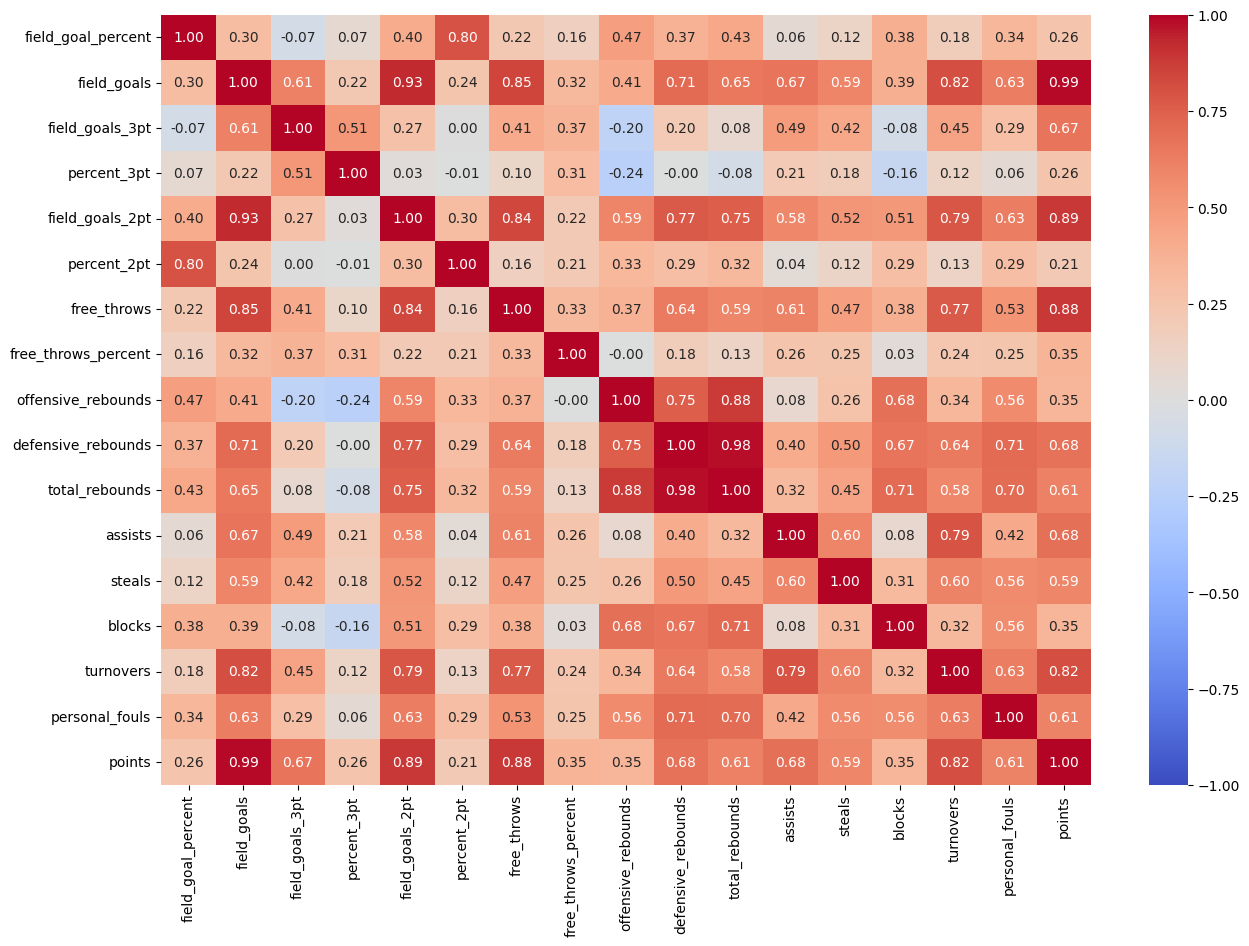

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Filter for numeric columns
numeric_df = nba_player_df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Identify Key Factors
key_factors = ['field_goal_percent', 'field_goals', 'field_goals_3pt', 'percent_3pt', 'field_goals_2pt', 'percent_2pt', 
               'free_throws', 'free_throws_percent', 'offensive_rebounds', 'defensive_rebounds', 'total_rebounds', 
               'assists', 'steals', 'blocks', 'turnovers', 'personal_fouls', 'points']

# Calculate the correlation matrix for the key factors
key_factors_corr_matrix = nba_player_df[key_factors].corr()

# Display the plot
plt.figure(figsize=(15, 10))
sns.heatmap(key_factors_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

KeyboardInterrupt: 

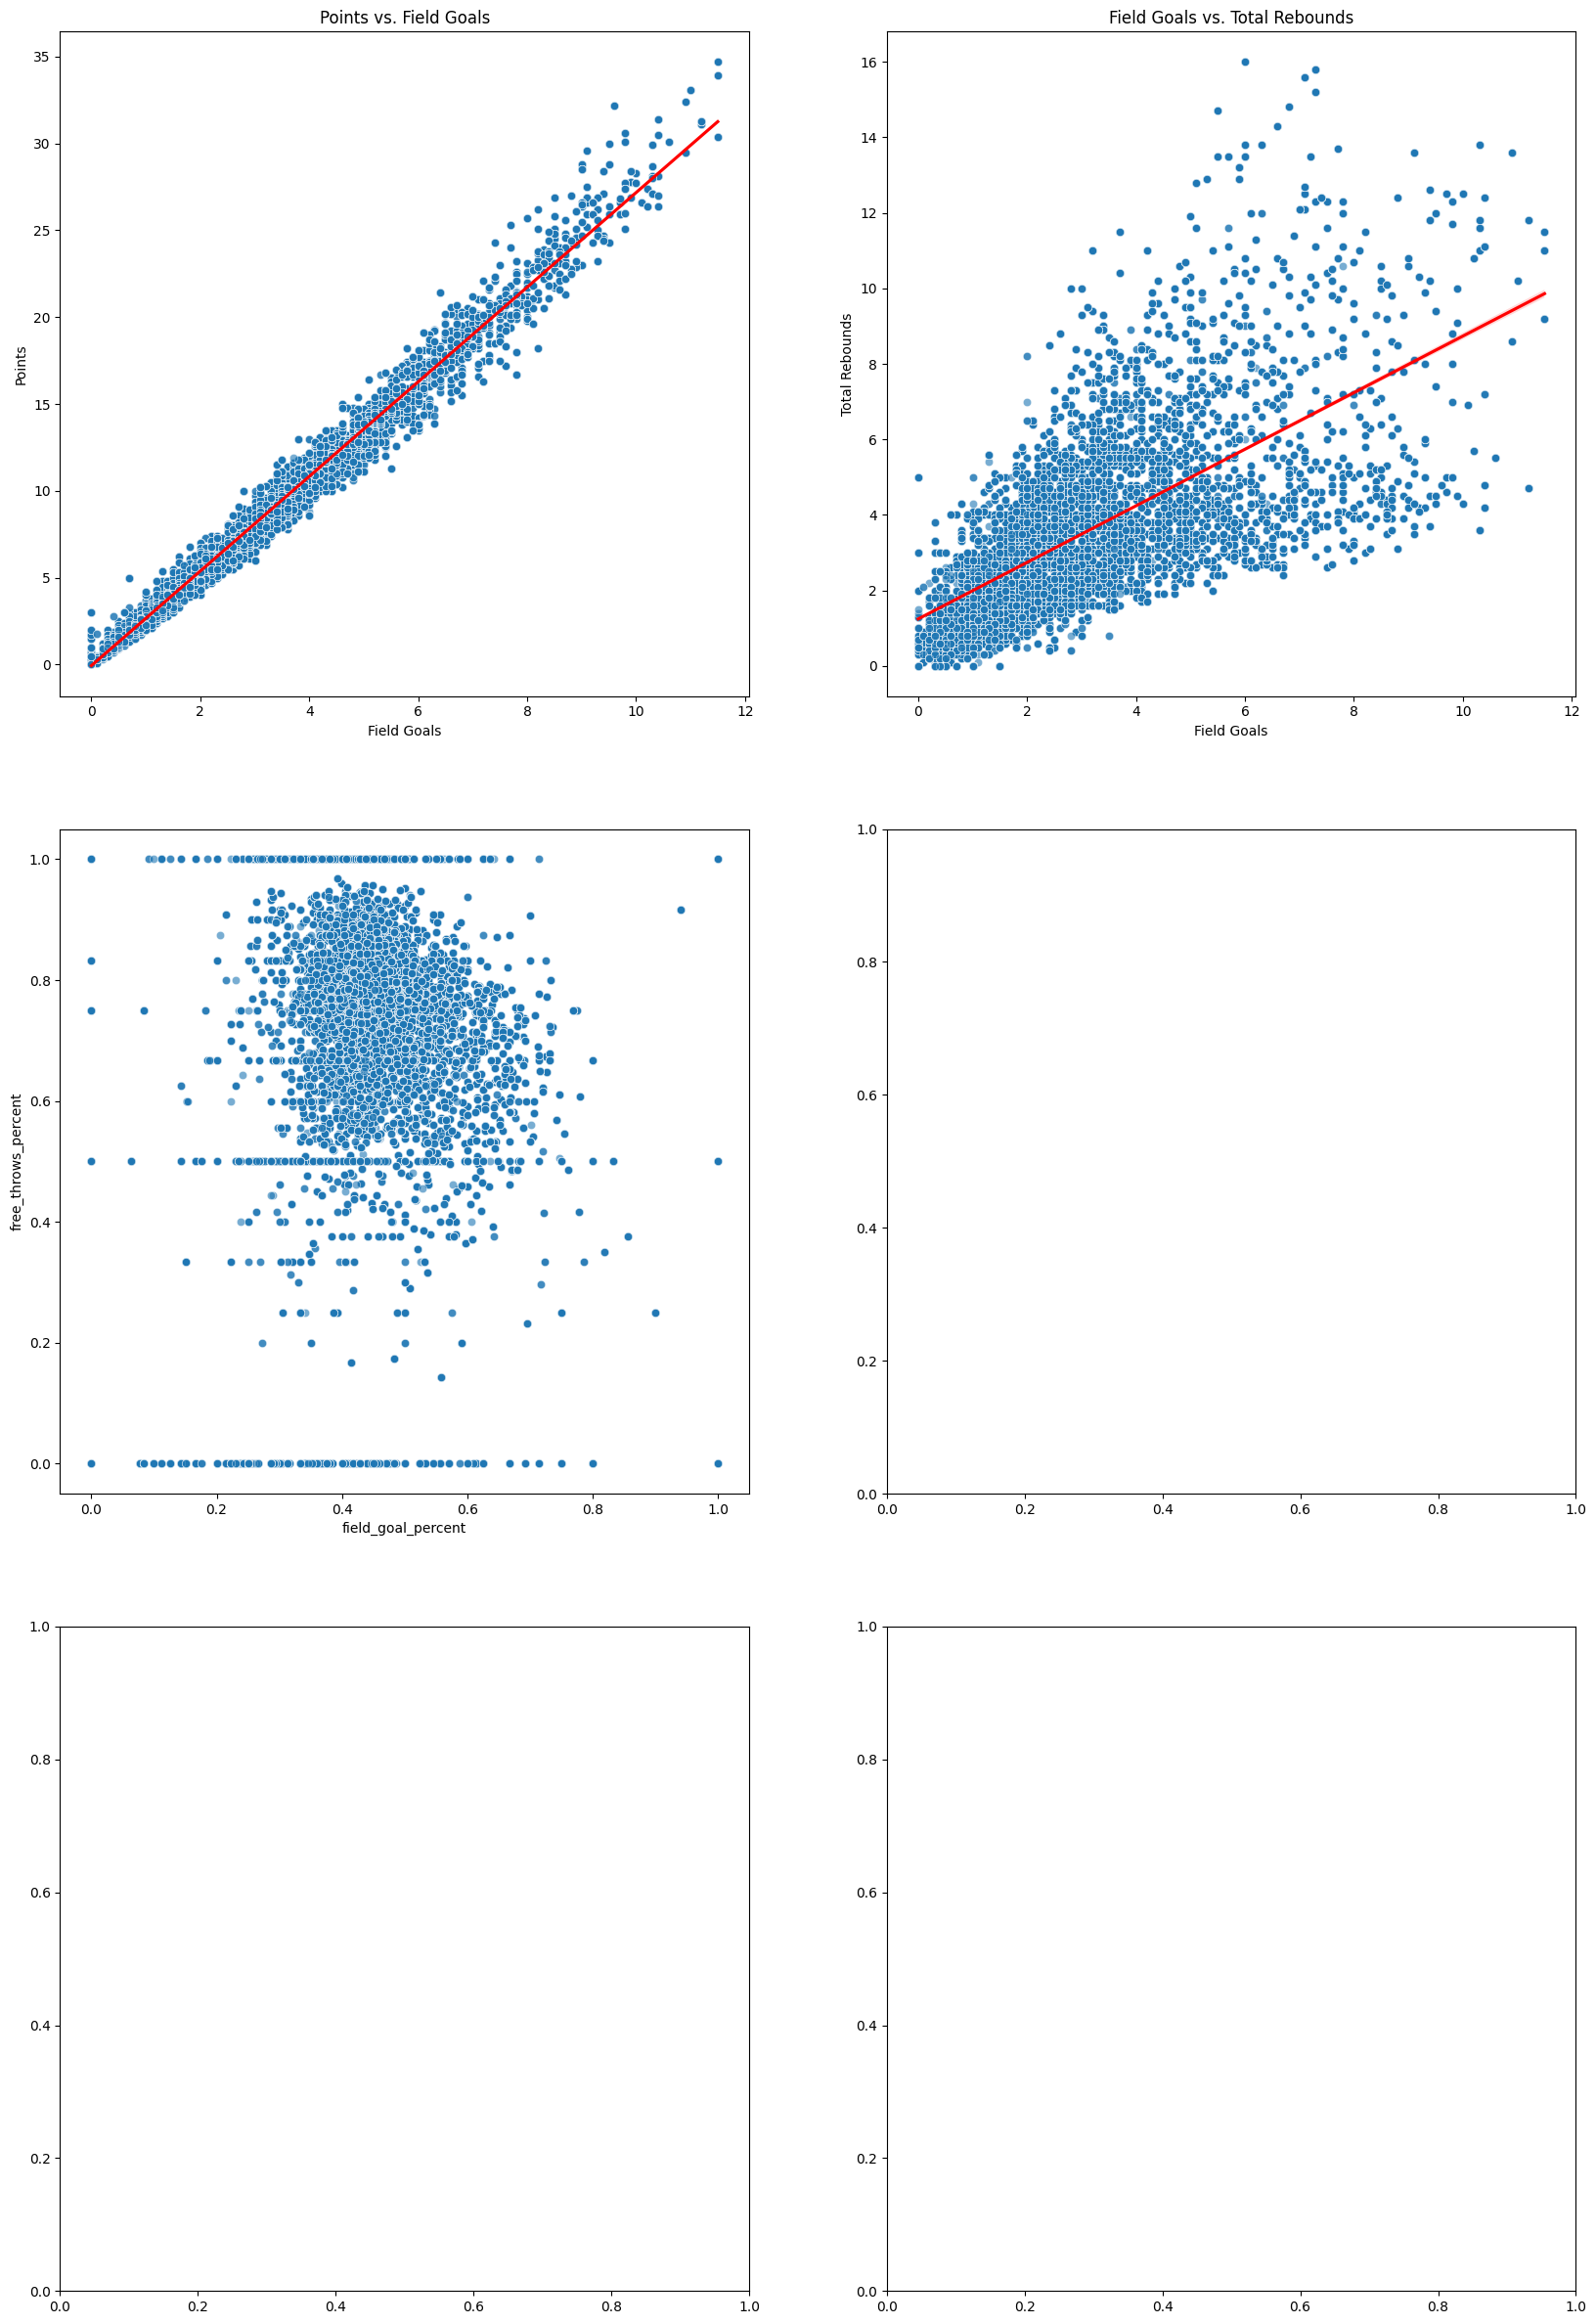

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
fig, axes = plt.subplots(3, 2, figsize=(20, 30))

# Points vs. Field Goals
sns.scatterplot(x='field_goals', y='points', data=nba_player_df, ax=axes[0, 0], alpha=0.6)
sns.regplot(x='field_goals', y='points', data=nba_player_df, ax=axes[0, 0], scatter=False, color='red')
axes[0, 0].set_title('Points vs. Field Goals')
axes[0, 0].set_xlabel('Field Goals')
axes[0, 0].set_ylabel('Points')

# Field Goals vs. Total Rebounds
sns.scatterplot(x='field_goals', y='total_rebounds', data=nba_player_df, ax=axes[0, 1], alpha=0.6)
sns.regplot(x='field_goals', y='total_rebounds', data=nba_player_df, ax=axes[0, 1], scatter=False, color='red')
axes[0, 1].set_title('Field Goals vs. Total Rebounds')
axes[0, 1].set_xlabel('Field Goals')
axes[0, 1].set_ylabel('Total Rebounds')

# Field Goal Percentage vs. Free Throws Percentage
sns.scatterplot(x='field_goal_percent', y='free_throws_percent', data=nba_player_df, ax=axes[1, 0], alpha=0.6)
sns.regplot(x='field_goal_percent', y='free_throws_percent', data=nba_player_df, ax=axes[1, 0], scatter=False, color='red')
axes[1, 0].set_title('Field Goal Percentage vs. Free Throws Percentage')
axes[1, 0].set_xlabel('Field Goal Percentage')
axes[1, 0].set_ylabel('Free Throws Percentage')

# Assists vs. Points
sns.scatterplot(x='assists', y='points', data=nba_player_df, ax=axes[1, 1], alpha=0.6)
sns.regplot(x='assists', y='points', data=nba_player_df, ax=axes[1, 1], scatter=False, color='red')
axes[1, 1].set_title('Assists vs. Points')
axes[1, 1].set_xlabel('Assists')
axes[1, 1].set_ylabel('Points')

# Defensive Rebounds vs. Total Rebounds
sns.scatterplot(x='defensive_rebounds', y='total_rebounds', data=nba_player_df, ax=axes[2, 0], alpha=0.6)
sns.regplot(x='defensive_rebounds', y='total_rebounds', data=nba_player_df, ax=axes[2, 0], scatter=False, color='red')
axes[2, 0].set_title('Defensive Rebounds vs. Total Rebounds')
axes[2, 0].set_xlabel('Defensive Rebounds')
axes[2, 0].set_ylabel('Total Rebounds')

# Turnovers vs. Points
sns.scatterplot(x='turnovers', y='points', data=nba_player_df, ax=axes[2, 1], alpha=0.6)
sns.regplot(x='turnovers', y='points', data=nba_player_df, ax=axes[2, 1], scatter=False, color='red')
axes[2, 1].set_title('Turnovers vs. Points')
axes[2, 1].set_xlabel('Turnovers')
axes[2, 1].set_ylabel('Points')

# Adjust layout
plt.tight_layout()
plt.show()


TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

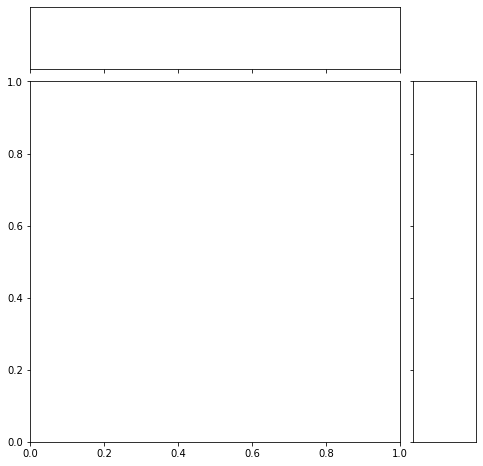

In [ ]:
import seaborn as sns

# Points vs. Field Goals
sns.jointplot(x='field_goals', y='points', data=nba_player_df, kind='reg', height=8)

# Field Goals vs. Total Rebounds
sns.jointplot(x='field_goals', y='total_rebounds', data=nba_player_df, kind='reg', height=8)

# Field Goal Percentage vs. Free Throws Percentage
sns.jointplot(x='field_goal_percent', y='free_throws_percent', data=nba_player_df, kind='reg', height=8)

# Assists vs. Points
sns.jointplot(x='assists', y='points', data=nba_player_df, kind='reg', height=8)

# Defensive Rebounds vs. Total Rebounds
sns.jointplot(x='defensive_rebounds', y='total_rebounds', data=nba_player_df, kind='reg', height=8)

# Turnovers vs. Points
sns.jointplot(x='turnovers', y='points', data=nba_player_df, kind='reg', height=8)

plt.show()

In [38]:
sns.pairplot(nba_player_df[['field_goals', 'points', 'total_rebounds', 'field_goal_percent', 'free_throws_percent', 'assists', 'defensive_rebounds', 'turnovers']], kind='reg')
plt.show()

KeyboardInterrupt: 

In [ ]:
# field_goals, points, and total_rebounds have right-skewed distributions, while variables like free_throws_percent and field_goal_percent have distributions with distinct clustering or gaps.
# Points vs. Field Goals: There is a strong positive correlation, indicating that players who score more field goals tend to have higher points.
# Total Rebounds vs. Field Goals: There is a moderate positive correlation, suggesting that players with more field goals also tend to have more total rebounds
# Free Throws Percent vs. Field Goals: The relationship seems weaker, indicating that field goals may not directly predict free throw percentage.
# Assists vs. Points: There is a moderate positive correlation, suggesting players who assist more also tend to score more points.
# Strong Correlations: Points and Field Goals Total Rebounds/ Points and Assists
# Potential Data Transformations:Right-skewed distributions (e.g., points, total rebounds) might benefit from transformations (e.g., log transformation) to achieve normality.


In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Define a function to create QQ plots for multiple columns
def qq_plot(data, columns):
    plt.figure(figsize=(20, 15))
    for i, col in enumerate(columns, 1):
        plt.subplot(3, 3, i)
        sm.qqplot(data[col].dropna(), line='s', ax=plt.gca())
        plt.title(f'QQ Plot of {col}')
    plt.tight_layout()
    plt.show()

# List of columns to generate QQ plots for
columns = ['field_goals', 'points', 'total_rebounds', 'field_goal_percent', 'free_throws_percent', 'assists', 'defensive_rebounds', 'turnovers']

# Generate QQ plots
qq_plot(nba_player_df, columns)


In [ ]:
# Field Goals, Points, Total Rebounds, Assists, Defensive Rebounds: The points show a pronounced curve, indicating that these variables are not normally distributed and have heavier tails than the normal distribution.
# Field Goal Percentage, Free Throws Percentage: The points deviate from the reference line, suggesting that these percentages are not normally distributed and show significant skewness and/or heavy tails.
# Turnovers: Similar to other performance metrics, turnovers also deviate from the reference line, indicating non-normality.

In [ ]:
# Implications
# Data Transformation: Since many of variables are not normally distributed, might consider data transformations (e.g., log transformation, Box-Cox transformation) to achieve normality, which can be beneficial for certain statistical analyses and models.
# Robust Methods: If transformation is not feasible or does not achieve normality, consider using robust statistical methods that do not assume normality.
# Model Selection: Some machine learning algorithms (e.g., tree-based methods like Random Forests and Gradient Boosting) do not assume normality and can handle skewed distributions well.

## Feature Engineering

In [41]:
nba_player_df.columns

Index(['index', 'player_id', 'season_id', 'season', 'player_name', 'position',
       'age', 'experience', 'league', 'team', 'games_played', 'games_started',
       'mins_per_game', 'field_goals', 'field_goals_attempt',
       'field_goal_percent', 'field_goals_3pt', 'attempts_3pt', 'percent_3pt',
       'field_goals_2pt', 'attempts_2pt', 'percent_2pt',
       'effective_field_goal_percent', 'free_throws', 'free_throws_attempt',
       'free_throws_percent', 'offensive_rebounds', 'defensive_rebounds',
       'total_rebounds', 'assists', 'steals', 'blocks', 'turnovers',
       'personal_fouls', 'points', 'average_shot_distance',
       'field_goal_attempts_percent_2pt_range',
       'field_goal_attempts_percent_3pt_range', 'field_goal_percent_2pt_range',
       'field_goal_percent_3pt_range', 'field_goal_assist_percent_2pt_range',
       'field_goal_assist_percent_3pt_range',
       'field_goal_attempts_dunk_percent', 'num_of_dunks',
       'corner_3pt_percent', 'num_heaves_attempted', 

In [42]:
num_players = len(nba_player_df['player_name'].unique())
print(f'Number of players: {num_players}')

Number of players: 1148


In [43]:
nba_player_df['position'].unique()

array(['SG', 'SF', 'PF', 'PG', 'C', 'SF-PF', 'PG-SG', 'SF-SG', 'C-PF',
       'SG-PG', 'PF-C', 'PF-SF', 'SG-SF', 'SG-PG-SF'], dtype=object)

In [44]:
nba_player_df['personal_fouls'].unique()

array([0.9, 0.5, 0.3, 1.9, 1.6, 3.3, 1.2, 0. , 0.6, 0.4, 0.8, 2.5, 1.4,
       0.2, 2.3, 1.5, 1.8, 2.1, 1. , 2.8, 2.2, 2.4, 2. , 1.7, 1.3, 1.1,
       0.7, 0.1, 3.1, 2.6, 2.9, 3. , 2.7, 3.6, 3.5, 3.2, 3.4, 3.8, 4. ,
       5. , 3.7, 4.1, 4.9])

In [45]:
nba_player_df['position'].value_counts()

position
SG          9369
C           7760
SF          7720
PF          6956
PG          6637
SF-SG        135
PF-SF        105
PG-SG         91
SF-PF         88
C-PF          77
SG-PG         67
PF-C          63
SG-SF         58
SG-PG-SF       9
Name: count, dtype: int64

In [46]:
# Output Columns: Career Longevity (Short/Long Career) and Player Performance (Under/OverPerformed Players): Performance value of player
# Input Columns: player_name, season, league, team, games_played, mins_per_game, points, conversion_rate (based on point range scored/attempts), num_seasons, assists

In [47]:
nba_player_df.columns

Index(['index', 'player_id', 'season_id', 'season', 'player_name', 'position',
       'age', 'experience', 'league', 'team', 'games_played', 'games_started',
       'mins_per_game', 'field_goals', 'field_goals_attempt',
       'field_goal_percent', 'field_goals_3pt', 'attempts_3pt', 'percent_3pt',
       'field_goals_2pt', 'attempts_2pt', 'percent_2pt',
       'effective_field_goal_percent', 'free_throws', 'free_throws_attempt',
       'free_throws_percent', 'offensive_rebounds', 'defensive_rebounds',
       'total_rebounds', 'assists', 'steals', 'blocks', 'turnovers',
       'personal_fouls', 'points', 'average_shot_distance',
       'field_goal_attempts_percent_2pt_range',
       'field_goal_attempts_percent_3pt_range', 'field_goal_percent_2pt_range',
       'field_goal_percent_3pt_range', 'field_goal_assist_percent_2pt_range',
       'field_goal_assist_percent_3pt_range',
       'field_goal_attempts_dunk_percent', 'num_of_dunks',
       'corner_3pt_percent', 'num_heaves_attempted', 

In [48]:
nba_player_df

,index,player_id,season_id,season,player_name,position,age,experience,league,team,...,field_goal_assist_percent_3pt_range,field_goal_attempts_dunk_percent,num_of_dunks,corner_3pt_percent,num_heaves_attempted,num_heaves_made,hall_of_fame_status,num_seasons,first_season,last_season
0,0,5025,31136,2024,A.J. Green,SG,24.0,2,NBA,MIL,...,0.942,0.000,0.0,0.447,0.0,0.0,False,2,2023,2024
1,1,5025,31136,2024,A.J. Green,SG,24.0,2,NBA,MIL,...,0.909,0.000,0.0,0.409,0.0,0.0,False,2,2023,2024
2,2,5026,31137,2024,A.J. Lawson,SG,23.0,2,NBA,DAL,...,1.000,0.107,12.0,0.250,0.0,0.0,False,2,2023,2024
3,3,5026,31137,2024,A.J. Lawson,SG,23.0,2,NBA,DAL,...,1.000,0.136,5.0,0.214,0.0,0.0,False,2,2023,2024
4,4,5026,31137,2024,A.J. Lawson,SG,23.0,2,NBA,DAL,...,0.000,1.000,1.0,0.000,0.0,0.0,False,2,2023,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82773,82773,4140,24475,2013,Will Barton,SG,22.0,1,NBA,POR,...,0.696,0.071,24.0,0.240,2.0,0.0,False,11,2013,2023
82774,82774,4140,24475,2013,Will Barton,SG,22.0,1,NBA,POR,...,0.250,0.080,8.0,0.250,1.0,0.0,False,11,2013,2023
82775,82775,4140,24475,2013,Will Barton,SG,22.0,1,NBA,POR,...,0.789,0.067,16.0,0.235,1.0,0.0,False,11,2013,2023
82776,82776,4140,24475,2013,Will Barton,SG,22.0,1,NBA,POR,...,0.800,0.109,16.0,0.400,1.0,0.0,False,11,2013,2023


In [49]:
nba_player_df[['player_id', 'player_name', 'points','team', 'mins_per_game']]

,player_id,player_name,points,team,mins_per_game
0,5025,A.J. Green,4.5,MIL,11.0
1,5025,A.J. Green,4.5,MIL,11.0
2,5026,A.J. Lawson,3.2,DAL,7.4
3,5026,A.J. Lawson,3.2,DAL,7.4
4,5026,A.J. Lawson,3.2,DAL,7.4
...,...,...,...,...,...
82773,4140,Will Barton,4.0,POR,12.2
82774,4140,Will Barton,4.0,POR,12.2
82775,4140,Will Barton,4.0,POR,12.2
82776,4140,Will Barton,4.0,POR,12.2


In [50]:
points_mean = nba_player_df.groupby('player_id')['points'].mean().to_dict()
nba_player_df['player_points'] = nba_player_df['player_id'].map(points_mean)

mins_mean = nba_player_df.groupby('player_id')['mins_per_game'].mean().to_dict()
nba_player_df['player_game_time'] = nba_player_df['player_id'].map(mins_mean)

nba_player_df['points_mins_ratio'] = nba_player_df['player_points'] / nba_player_df['player_game_time']

In [51]:
nba_player_df['points_mins_ratio'] = nba_player_df['points_mins_ratio'].apply(lambda x: round(x, 2))

nba_player_df[['player_id', 'player_name', 'points','mins_per_game', 'player_points', 'player_game_time', 'points_mins_ratio']]

,player_id,player_name,points,mins_per_game,player_points,player_game_time,points_mins_ratio
0,5025,A.J. Green,4.5,11.0,4.450000,10.450000,0.43
1,5025,A.J. Green,4.5,11.0,4.450000,10.450000,0.43
2,5026,A.J. Lawson,3.2,7.4,3.200000,6.050000,0.53
3,5026,A.J. Lawson,3.2,7.4,3.200000,6.050000,0.53
4,5026,A.J. Lawson,3.2,7.4,3.200000,6.050000,0.53
...,...,...,...,...,...,...,...
82773,4140,Will Barton,4.0,12.2,9.706667,22.493333,0.43
82774,4140,Will Barton,4.0,12.2,9.706667,22.493333,0.43
82775,4140,Will Barton,4.0,12.2,9.706667,22.493333,0.43
82776,4140,Will Barton,4.0,12.2,9.706667,22.493333,0.43


In [52]:
nba_grouped_df = (nba_player_df.groupby('player_id').agg({'steals': 'mean', 'blocks': 'mean', 'turnovers': 'mean'}).reset_index())

In [54]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(nba_grouped_df[['steals', 'blocks', 'turnovers']])

In [55]:
scaled_df = pd.DataFrame(scaled_data, columns=['scaled_steals', 'scaled_blocks', 'scaled_turnovers'])

grouped_df = pd.concat([nba_grouped_df[['player_id']], scaled_df], axis=1)

weight_steals = 0.4
weight_blocks = 0.4
weight_turnovers = -0.2

# Calculate the defense metric 
grouped_df['defensive_metric'] = (grouped_df['scaled_steals'] * weight_steals + grouped_df['scaled_blocks'] * weight_blocks + grouped_df['scaled_turnovers'] * weight_turnovers)

In [56]:
grouped_df

,player_id,scaled_steals,scaled_blocks,scaled_turnovers,defensive_metric
0,4063,0.370370,0.055556,0.281746,0.114021
1,4064,0.805898,0.350309,0.502646,0.361954
2,4065,0.194004,0.071429,0.153061,0.075561
3,4066,0.823045,0.629630,0.476190,0.485832
4,4067,0.339506,0.069444,0.119048,0.139771
...,...,...,...,...,...
1142,5205,0.246914,0.305556,0.166667,0.187654
1143,5206,0.205761,0.212963,0.261905,0.115109
1144,5207,0.308642,0.194444,0.238095,0.153616
1145,5208,0.308642,0.027778,0.396825,0.055203


In [57]:
nba_player_df = pd.merge(nba_player_df, grouped_df[['player_id', 'defensive_metric']], on='player_id', how='left')

In [58]:
nba_player_df[['steals', 'blocks', 'turnovers', 'defensive_metric']]

,steals,blocks,turnovers,defensive_metric
0,0.2,0.1,0.2,0.043034
1,0.2,0.1,0.2,0.043034
2,0.2,0.1,0.3,0.019136
3,0.2,0.1,0.3,0.019136
4,0.2,0.1,0.3,0.019136
...,...,...,...,...
39130,0.5,0.1,0.8,0.157296
39131,0.5,0.1,0.8,0.157296
39132,0.5,0.1,0.8,0.157296
39133,0.5,0.1,0.8,0.157296


In [59]:
nba_player_df['defensive_metric'] = nba_player_df['defensive_metric'].apply(lambda x: round(x, 2))

In [60]:
nba_player_df[['player_id', 'points_mins_ratio', 'total_rebounds', 'defensive_metric']]

,player_id,points_mins_ratio,total_rebounds,defensive_metric
0,5025,0.43,1.1,0.04
1,5025,0.43,1.1,0.04
2,5026,0.53,1.2,0.02
3,5026,0.53,1.2,0.02
4,5026,0.53,1.2,0.02
...,...,...,...,...
39130,4140,0.43,2.0,0.16
39131,4140,0.43,2.0,0.16
39132,4140,0.43,2.0,0.16
39133,4140,0.43,2.0,0.16


In [61]:
min_point = nba_player_df['points_mins_ratio'].min()
max_point = nba_player_df['points_mins_ratio'].max()

min_rebound = nba_player_df['total_rebounds'].min()
max_rebound = nba_player_df['total_rebounds'].max()

min_defensive = nba_player_df['defensive_metric'].min()
max_defensive = nba_player_df['defensive_metric'].max()

print(f'Min value points_mins_ratio: {min_point}, Max value points_mins_ratio: {max_point}')
print(f'Min value total rebounds: {min_rebound}, Max value total rebounds: {max_rebound}')
print(f'Min value defensive metric: {min_defensive}, Max value defensive metric: {max_defensive}')

Min value points_mins_ratio: 0.0, Max value points_mins_ratio: 2.0
Min value total rebounds: 0.0, Max value total rebounds: 16.0
Min value defensive metric: -0.08, Max value defensive metric: 0.52


In [62]:
# Normalizing the data based on a scale from 0-1 and then multiply by their weights to get player rating

weight_points = 0.45
weight_rebound = 0.2
weight_defensive = 0.35

nba_player_df['norm_points_mins_ratio'] = ((nba_player_df['points_mins_ratio'] - min_point) / (max_point - min_point))
nba_player_df['norm_rebounds'] = ((nba_player_df['total_rebounds'] - min_rebound) / (max_rebound - min_rebound))
nba_player_df['norm_defensive_metric'] = ((nba_player_df['defensive_metric'] - min_defensive) / (max_defensive - min_defensive))

In [63]:
nba_player_df['norm_points_mins_ratio'] = nba_player_df['norm_points_mins_ratio'].apply(lambda x: round(x, 2))
nba_player_df['norm_rebounds'] = nba_player_df['norm_rebounds'].apply(lambda x: round(x, 2))
nba_player_df['norm_defensive_metric'] = nba_player_df['norm_defensive_metric'].apply(lambda x: round(x, 2))

# Get a player rating scale between 1-5
nba_player_df['player_rating'] = ((nba_player_df['norm_points_mins_ratio'] * weight_points) + (nba_player_df['norm_rebounds'] * weight_rebound) +
                                (nba_player_df['norm_defensive_metric'] * weight_defensive)) * 5


In [64]:
nba_player_df[['norm_points_mins_ratio', 'norm_rebounds', 'norm_defensive_metric', 'player_rating']]

,norm_points_mins_ratio,norm_rebounds,norm_defensive_metric,player_rating
0,0.21,0.07,0.20,0.8925
1,0.21,0.07,0.20,0.8925
2,0.27,0.07,0.17,0.9750
3,0.27,0.07,0.17,0.9750
4,0.27,0.07,0.17,0.9750
...,...,...,...,...
39130,0.21,0.12,0.40,1.2925
39131,0.21,0.12,0.40,1.2925
39132,0.21,0.12,0.40,1.2925
39133,0.21,0.12,0.40,1.2925


In [65]:
nba_player_df['player_rating'].describe()

count    39135.000000
mean         1.360886
std          0.396210
min          0.087500
25%          1.077500
50%          1.312500
75%          1.575000
max          3.240000
Name: player_rating, dtype: float64

In [66]:
range_rating = nba_player_df['player_rating'].quantile([0.4, 0.5, 0.6, 0.7, 0.8])
print(range_rating)

0.4    1.2200
0.5    1.3125
0.6    1.4125
0.7    1.5270
0.8    1.6400
Name: player_rating, dtype: float64


In [67]:
# Considering 70 quantile value of player_rating as a threshold
# 70 quantile value: 1.5270

nba_player_df['player_performance_metric'] = nba_player_df['player_rating'].apply(lambda x: 1 if x >= 1.5270 else 0)

In [68]:
nba_player_df['player_performance'] = nba_player_df['player_performance_metric'].apply(lambda x: 'High Performance' if x == 1 else 'Low Performance')

In [69]:
nba_player_df[['player_performance_metric', 'player_performance']].sort_values(by = 'player_performance_metric')

,player_performance_metric,player_performance
0,0,Low Performance
24393,0,Low Performance
24392,0,Low Performance
24391,0,Low Performance
24381,0,Low Performance
...,...,...
9483,1,High Performance
9482,1,High Performance
26307,1,High Performance
26309,1,High Performance


In [70]:
print(nba_player_df['player_performance'].value_counts())

player_performance
Low Performance     27394
High Performance    11741
Name: count, dtype: int64


## Data Modelling

In [71]:
# Input Variables: 'position', 'age', 'experience', 'games_played', 'games_started', 'personal_fouls', 'average_shot_distance', 'num_seasons'

# Output Variables: 
# player_performance: Points_min_ratio('points'/'mins_per_game'), Rebounds('total_rebounds'), Defence (steals, blocks, turnovers)

In [72]:
# One-hot encoding for the position column
encoded_position = pd.get_dummies(nba_player_df['position'], prefix='position')

nba_player_df = pd.concat([nba_player_df, encoded_position], axis=1)

In [73]:
nba_player_df.columns

Index(['index', 'player_id', 'season_id', 'season', 'player_name', 'position',
       'age', 'experience', 'league', 'team', 'games_played', 'games_started',
       'mins_per_game', 'field_goals', 'field_goals_attempt',
       'field_goal_percent', 'field_goals_3pt', 'attempts_3pt', 'percent_3pt',
       'field_goals_2pt', 'attempts_2pt', 'percent_2pt',
       'effective_field_goal_percent', 'free_throws', 'free_throws_attempt',
       'free_throws_percent', 'offensive_rebounds', 'defensive_rebounds',
       'total_rebounds', 'assists', 'steals', 'blocks', 'turnovers',
       'personal_fouls', 'points', 'average_shot_distance',
       'field_goal_attempts_percent_2pt_range',
       'field_goal_attempts_percent_3pt_range', 'field_goal_percent_2pt_range',
       'field_goal_percent_3pt_range', 'field_goal_assist_percent_2pt_range',
       'field_goal_assist_percent_3pt_range',
       'field_goal_attempts_dunk_percent', 'num_of_dunks',
       'corner_3pt_percent', 'num_heaves_attempted', 

In [74]:
model_df = nba_player_df.groupby('player_id').agg({
    'position_C' : 'max', 
    'position_C-PF' : 'max', 
    'position_PF' : 'max',
    'position_PF-C' : 'max', 
    'position_PF-SF' : 'max', 
    'position_PG': 'max', 
    'position_PG-SG' : 'max',
    'position_SF' : 'max', 
    'position_SF-PF' : 'max', 
    'position_SF-SG' : 'max', 
    'position_SG' : 'max',
    'position_SG-PG' : 'max', 
    'position_SG-PG-SF' : 'max', 
    'position_SG-SF' : 'max',  
    'age': 'mean', 
    'experience': 'mean',
    'games_played': 'mean',
    'games_started': 'mean',  
    'personal_fouls': 'mean',
    'average_shot_distance': 'mean',
    'num_seasons': 'mean',
    'player_rating': 'mean'
})

# Reset index to convert the groupby object back to a DataFrame
model_df.reset_index(inplace=True)

# Split data into input and output variables

X = model_df[['position_C', 'position_C-PF', 'position_PF', 'position_PF-C', 'position_PF-SF', 'position_PG', 'position_PG-SG',
       'position_SF', 'position_SF-PF', 'position_SF-SG', 'position_SG', 'position_SG-PG', 'position_SG-PG-SF', 'position_SG-SF', 
       'age', 'experience', 'games_played', 'games_started', 'personal_fouls', 'average_shot_distance', 'num_seasons']]

y =  model_df['player_rating']

In [75]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1147 entries, 0 to 1146
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   player_id              1147 non-null   int64  
 1   position_C             1147 non-null   bool   
 2   position_C-PF          1147 non-null   bool   
 3   position_PF            1147 non-null   bool   
 4   position_PF-C          1147 non-null   bool   
 5   position_PF-SF         1147 non-null   bool   
 6   position_PG            1147 non-null   bool   
 7   position_PG-SG         1147 non-null   bool   
 8   position_SF            1147 non-null   bool   
 9   position_SF-PF         1147 non-null   bool   
 10  position_SF-SG         1147 non-null   bool   
 11  position_SG            1147 non-null   bool   
 12  position_SG-PG         1147 non-null   bool   
 13  position_SG-PG-SF      1147 non-null   bool   
 14  position_SG-SF         1147 non-null   bool   
 15  age 

In [76]:
model_df.head(10)

,player_id,position_C,position_C-PF,position_PF,position_PF-C,position_PF-SF,position_PG,position_PG-SG,position_SF,position_SF-PF,...,position_SG-PG-SF,position_SG-SF,age,experience,games_played,games_started,personal_fouls,average_shot_distance,num_seasons,player_rating
0,4063,False,False,False,False,False,False,False,False,False,...,False,False,25.500000,2.500000,37.333333,5.666667,1.033333,14.966667,3.0,1.250833
1,4064,True,False,False,False,False,False,False,False,False,...,False,False,25.333333,7.333333,57.777778,43.222222,2.966667,3.305556,12.0,2.566944
2,4065,False,False,True,False,False,False,False,False,False,...,False,False,25.571429,3.571429,46.142857,5.142857,1.542857,12.728571,5.0,1.060000
3,4066,True,False,True,False,False,False,False,False,False,...,False,False,24.500000,6.500000,61.333333,60.750000,2.350000,9.475000,12.0,3.104167
4,4067,False,False,True,False,False,False,False,False,False,...,False,False,22.500000,1.500000,29.500000,1.000000,1.350000,8.450000,2.0,1.102500
5,4068,True,False,False,False,False,False,False,False,False,...,False,False,30.000000,5.000000,58.000000,18.666667,2.211111,7.844444,9.0,1.102222
6,4069,False,False,False,False,False,True,True,False,False,...,False,False,25.117647,6.117647,52.647059,12.411765,2.082353,14.476471,11.0,1.158824
7,4070,False,False,False,False,False,True,False,False,False,...,False,False,25.000000,1.000000,28.000000,0.000000,0.800000,18.500000,1.0,0.757500
8,4071,True,False,False,False,False,False,False,False,False,...,False,False,28.000000,2.000000,30.666667,4.333333,1.100000,3.300000,3.0,0.954167
9,4072,False,False,False,False,False,False,False,False,False,...,False,False,24.500000,6.500000,62.333333,59.500000,2.233333,14.666667,12.0,1.797500


In [77]:
# Training and Testing the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Linear Regression Model
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

# Predictions
y_pred = lin_model.predict(X_test)

In [79]:
# Model Evaluation
mse_score = mean_squared_error(y_test, y_pred)
r2_score = r2_score(y_test, y_pred)
mae_score = mean_absolute_error(y_test, y_pred)
rmse_score = mean_squared_error(y_test, y_pred, squared=False)

print(f'Mean Squared Error: {mse_score}')
print(f'R-squared score: {r2_score}')
print(f'Mean Absolute score: {mae_score}')
print(f'Root Mean Squared score: {rmse_score}')

Mean Squared Error: 0.05647097014886473
R-squared score: 0.6680182696738695
Mean Absolute score: 0.17879570651303162
Root Mean Squared score: 0.23763621388345826


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [80]:
# Comparing Predicted and original dataframe Values
for orgin_val, pred_val in zip(y_test, y_pred):
    print(f'Original Value: {orgin_val}, Predicted Value: {pred_val}')

Original Value: 1.5571153846153845, Predicted Value: 1.5646407161443814
Original Value: 1.0150000000000001, Predicted Value: 0.7966307131526578
Original Value: 0.6425, Predicted Value: 0.694936716132911
Original Value: 0.8525, Predicted Value: 0.9186234098139954
Original Value: 1.2425, Predicted Value: 0.7949629022293693
Original Value: 1.0003846153846156, Predicted Value: 1.1848533126228413
Original Value: 1.4975, Predicted Value: 1.600030989457809
Original Value: 0.9099999999999999, Predicted Value: 0.8899609096746386
Original Value: 1.3625, Predicted Value: 1.6287011826848738
Original Value: 1.2475, Predicted Value: 1.2124680470097977
Original Value: 1.3916666666666666, Predicted Value: 1.292814148080295
Original Value: 1.2946428571428572, Predicted Value: 1.0351699956402647
Original Value: 1.1475, Predicted Value: 0.9136631903798407
Original Value: 2.1325, Predicted Value: 1.886974761382449
Original Value: 1.3350000000000002, Predicted Value: 0.785625263264138
Original Value: 0.65,

In [81]:
## Convert 'age', 'experience', 'games_played', 'games_started', 'personal_fouls', 'average_shot_distance', 'num_seasons' to binary values for classificatiion
## Use player_performance_metric as an output variable 
## Test for Classification models

In [82]:
##  Check Classification Models

In [83]:
md_df = nba_player_df[['age', 'experience', 'games_played', 'games_started', 'personal_fouls', 'average_shot_distance', 'num_seasons',
                       'position_C', 'position_C-PF', 'position_PF', 'position_PF-C', 'position_PF-SF', 'position_PG', 'position_PG-SG',
                       'position_SF', 'position_SF-PF', 'position_SF-SG', 'position_SG', 'position_SG-PG', 'position_SG-PG-SF', 'position_SG-SF',
                       'player_performance_metric']]

md_df

,age,experience,games_played,games_started,personal_fouls,average_shot_distance,num_seasons,position_C,position_C-PF,position_PF,...,position_PG,position_PG-SG,position_SF,position_SF-PF,position_SF-SG,position_SG,position_SG-PG,position_SG-PG-SF,position_SG-SF,player_performance_metric
0,24.0,2,56,0.0,0.9,24.1,2,False,False,False,...,False,False,False,False,False,True,False,False,False,0
1,24.0,2,56,0.0,0.9,23.7,2,False,False,False,...,False,False,False,False,False,True,False,False,False,0
2,23.0,2,42,0.0,0.5,13.7,2,False,False,False,...,False,False,False,False,False,True,False,False,False,0
3,23.0,2,42,0.0,0.5,14.7,2,False,False,False,...,False,False,False,False,False,True,False,False,False,0
4,23.0,2,42,0.0,0.5,0.5,2,False,False,False,...,False,False,False,False,False,True,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39130,22.0,1,73,5.0,0.8,10.8,11,False,False,False,...,False,False,False,False,False,True,False,False,False,0
39131,22.0,1,73,5.0,0.8,10.1,11,False,False,False,...,False,False,False,False,False,True,False,False,False,0
39132,22.0,1,73,5.0,0.8,11.1,11,False,False,False,...,False,False,False,False,False,True,False,False,False,0
39133,22.0,1,73,5.0,0.8,11.4,11,False,False,False,...,False,False,False,False,False,True,False,False,False,0


In [84]:
md_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39135 entries, 0 to 39134
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        39135 non-null  float64
 1   experience                 39135 non-null  int64  
 2   games_played               39135 non-null  int64  
 3   games_started              39135 non-null  float64
 4   personal_fouls             39135 non-null  float64
 5   average_shot_distance      39135 non-null  float64
 6   num_seasons                39135 non-null  int64  
 7   position_C                 39135 non-null  bool   
 8   position_C-PF              39135 non-null  bool   
 9   position_PF                39135 non-null  bool   
 10  position_PF-C              39135 non-null  bool   
 11  position_PF-SF             39135 non-null  bool   
 12  position_PG                39135 non-null  bool   
 13  position_PG-SG             39135 non-null  boo

In [85]:
X = md_df[['position_C', 'position_C-PF', 'position_PF', 'position_PF-C', 'position_PF-SF', 'position_PG', 'position_PG-SG',
           'position_SF', 'position_SF-PF', 'position_SF-SG', 'position_SG', 'position_SG-PG', 'position_SG-PG-SF', 'position_SG-SF',
           'age', 'experience', 'games_played', 'games_started', 'personal_fouls', 'average_shot_distance', 'num_seasons']]

y = md_df['player_performance_metric']

In [86]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Logistic regression

In [87]:
# Initialize and train the logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [88]:
# Make predictions
y_pred = log_reg.predict(X_test)
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]

In [89]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[7394  834]
 [1281 2232]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      8228
           1       0.73      0.64      0.68      3513

    accuracy                           0.82     11741
   macro avg       0.79      0.77      0.78     11741
weighted avg       0.82      0.82      0.82     11741


Accuracy Score:
0.8198620219742782


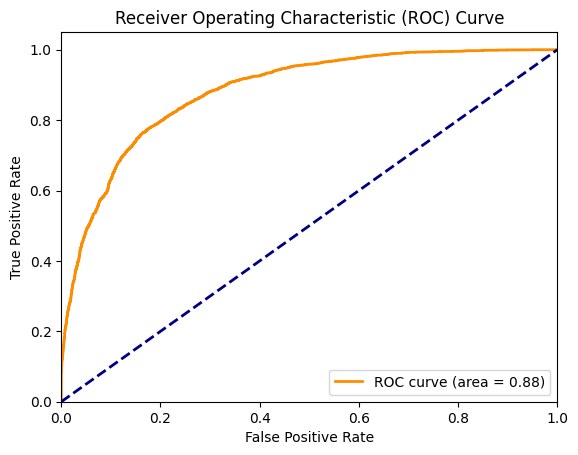

In [90]:
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [91]:
# Feature importance
feature_importance = np.abs(log_reg.coef_[0])
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display feature importance
print("\nFeature Importance:")
print(importance_df)


Feature Importance:
                  Feature  Importance
4          position_PF-SF    2.190557
8          position_SF-PF    1.470428
18         personal_fouls    1.367483
3           position_PF-C    1.225624
9          position_SF-SG    1.153645
1           position_C-PF    0.848704
6          position_PG-SG    0.836765
11         position_SG-PG    0.618821
13         position_SG-SF    0.608448
10            position_SG    0.342181
0              position_C    0.289078
15             experience    0.269951
14                    age    0.214795
7             position_SF    0.213489
5             position_PG    0.183233
20            num_seasons    0.170087
19  average_shot_distance    0.071242
12      position_SG-PG-SF    0.065865
2             position_PF    0.052292
17          games_started    0.022939
16           games_played    0.000528


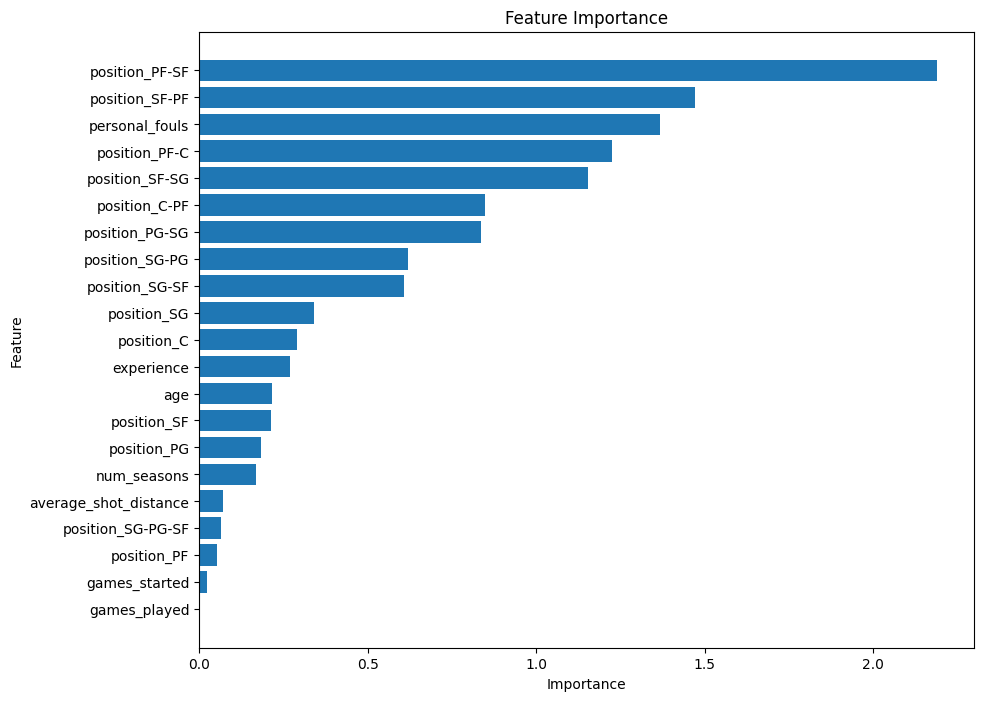

In [92]:
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  
plt.show()

### Decision Tree

Best parameters found:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Confusion Matrix:
[[8225    3]
 [  21 3492]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8228
           1       1.00      0.99      1.00      3513

    accuracy                           1.00     11741
   macro avg       1.00      1.00      1.00     11741
weighted avg       1.00      1.00      1.00     11741


Accuracy Score:
0.9979558811004173

ROC AUC: 0.9995


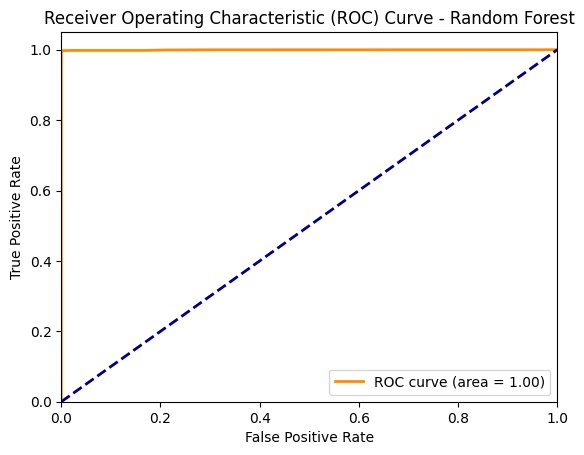

In [105]:
# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Initialize and train the grid search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters from grid search
print("Best parameters found: ", grid_search.best_params_)

# Use the best model to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Print evaluation metrics
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print("\nAccuracy Score:")
print(accuracy)
print(f"\nROC AUC: {roc_auc:.4f}")

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()

In [94]:
# Feature importance
feature_importance = decision_tree.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display feature importance
print("\nFeature Importance:")
print(importance_df)


Feature Importance:
                  Feature  Importance
18         personal_fouls    0.317536
17          games_started    0.184797
16           games_played    0.120690
20            num_seasons    0.107788
14                    age    0.079494
15             experience    0.059282
19  average_shot_distance    0.052464
5             position_PG    0.021388
2             position_PF    0.015912
7             position_SF    0.015881
10            position_SG    0.012334
0              position_C    0.005891
4          position_PF-SF    0.002015
9          position_SF-SG    0.001250
11         position_SG-PG    0.001209
3           position_PF-C    0.001012
1           position_C-PF    0.000739
8          position_SF-PF    0.000317
12      position_SG-PG-SF    0.000000
13         position_SG-SF    0.000000
6          position_PG-SG    0.000000


### Adaboost

In [96]:
# Initialize and train the AdaBoost classifier
adaboost = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost.fit(X_train, y_train)

# Make predictions
y_pred = adaboost.predict(X_test)
y_pred_prob = adaboost.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Print evaluation metrics
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print("\nAccuracy Score:")
print(accuracy)
print(f"\nROC AUC: {roc_auc:.4f}")

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Confusion Matrix:
[[7420  808]
 [1212 2301]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      8228
           1       0.74      0.65      0.69      3513

    accuracy                           0.83     11741
   macro avg       0.80      0.78      0.79     11741
weighted avg       0.82      0.83      0.82     11741


Accuracy Score:
0.8279533259517928

ROC AUC: 0.8948


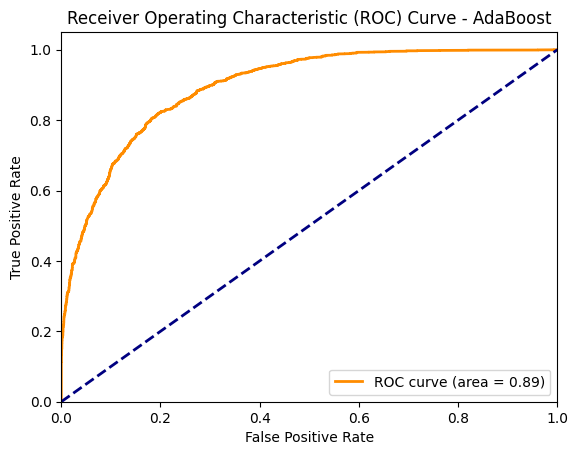

In [97]:
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - AdaBoost')
plt.legend(loc="lower right")
plt.show()


In [98]:
# Feature importance
feature_importance = adaboost.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display feature importance
print("\nFeature Importance:")
print(importance_df)


Feature Importance:
                  Feature  Importance
18         personal_fouls        0.25
19  average_shot_distance        0.21
17          games_started        0.11
14                    age        0.11
20            num_seasons        0.09
16           games_played        0.07
15             experience        0.07
9          position_SF-SG        0.01
11         position_SG-PG        0.01
10            position_SG        0.01
8          position_SF-PF        0.01
6          position_PG-SG        0.01
5             position_PG        0.01
4          position_PF-SF        0.01
3           position_PF-C        0.01
2             position_PF        0.01
1           position_C-PF        0.00
12      position_SG-PG-SF        0.00
13         position_SG-SF        0.00
7             position_SF        0.00
0              position_C        0.00


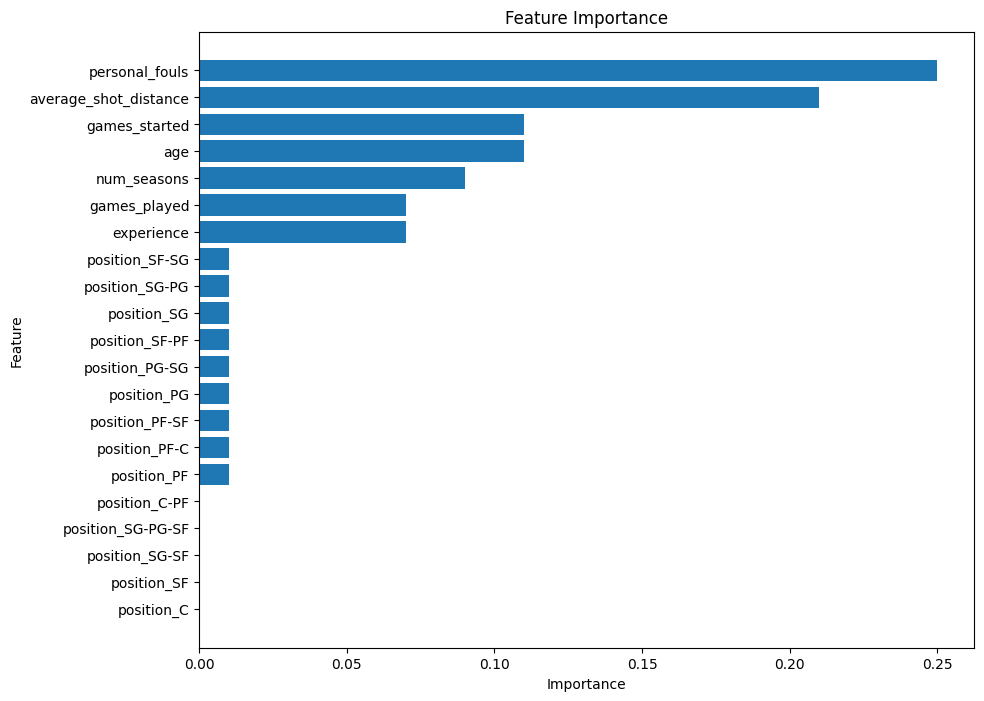

In [99]:
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  
plt.show()

### Random Forest

Confusion Matrix:
[[8225    3]
 [  23 3490]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8228
           1       1.00      0.99      1.00      3513

    accuracy                           1.00     11741
   macro avg       1.00      1.00      1.00     11741
weighted avg       1.00      1.00      1.00     11741


Accuracy Score:
0.9977855378587854

ROC AUC: 0.9996


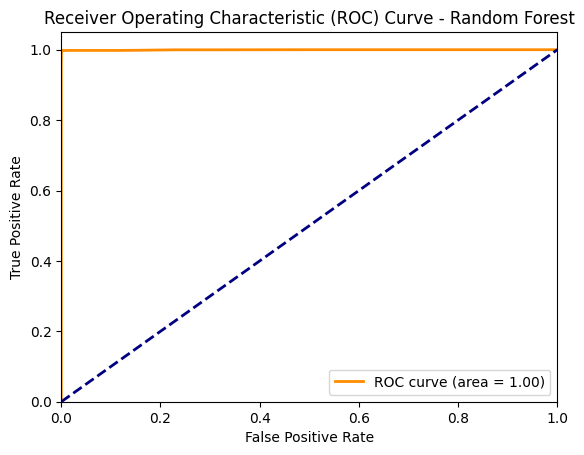

In [106]:
# Initialize and train the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)
y_pred_prob = rf.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Print evaluation metrics
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print("\nAccuracy Score:")
print(accuracy)
print(f"\nROC AUC: {roc_auc:.4f}")

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()

In [103]:
# Feature importance
feature_importance = rf.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display feature importance
print("\nFeature Importance:")
print(importance_df)


Feature Importance:
                  Feature  Importance
17          games_started    0.237161
18         personal_fouls    0.207167
16           games_played    0.133083
20            num_seasons    0.116739
19  average_shot_distance    0.083959
14                    age    0.081414
15             experience    0.073269
0              position_C    0.014022
10            position_SG    0.013368
2             position_PF    0.011382
7             position_SF    0.011177
5             position_PG    0.011134
8          position_SF-PF    0.001138
4          position_PF-SF    0.001127
3           position_PF-C    0.000947
9          position_SF-SG    0.000936
6          position_PG-SG    0.000652
1           position_C-PF    0.000623
11         position_SG-PG    0.000536
13         position_SG-SF    0.000164
12      position_SG-PG-SF    0.000004
